The **stroke.csv** contains data around one of the critical diseases "Stroke". Stroke is a disease that affects the arteries leading to and within the brain. several health, demographic and lifestyle details about its patients.<br>
A stroke occurs when a blood vessel that carries oxygen and nutrients to the brain is either blocked by a clot or bursts (or ruptures). When that happens, part of the brain cannot get the blood (and oxygen) it needs, so it and brain cells die.<br>
Over the last few years, data has been captured for several health, demographic and lifestyle details of patients. This includes details such as age and gender, along with several health parameters (e.g. hypertension, body mass index) and lifestyle related variables (e.g. smoking status, occupation type).<br>
Early identification and treatment of the most common type of stroke, ischemic stroke, can limit brain damage and vastly improve outcomes. Stroke prevention is also possible if patients with a high propensity are identified early. <br>
**stroke.csv** includes attributes for chance of stroke. For binary variables, 1 means yes, 0 means no. The data contains the following fields:<br>

* id: Patient ID
* gender: Gender of Patient
* age: Age of Patient
* hypertension: Patient suffering from hypertension?
* heart_disease: Patient suffering from heart disease?
* ever_married: Yes/No
* work_type: Type of occupation
* Residence_type: Area type of residence (Urban/ Rural)
* avg_glucose_level: Average Glucose level (measured after meal)
* bmi: Body mass index
* smoking_status: patient's smoking status
* stroke: Patient suffered from stroke?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

#For logistic Regression model
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# calculate accuracy measures and confusion matrix
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the csv file as a dataframe
df1 = pd.read_csv('stroke.csv')

In [3]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3,N,N,No,children,Rural,95.12,18.0,never smoked,0
1,Male,58,Y,N,Yes,Private,Urban,255.00,39.2,never smoked,1
2,Female,70,N,N,Yes,Private,Rural,69.04,35.9,formerly smoked,0
3,Female,52,N,N,Yes,Private,Urban,77.59,17.7,formerly smoked,0
4,Female,75,N,Y,Yes,Self-employed,Rural,103.00,27.0,never smoked,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29073 entries, 0 to 29072
Data columns (total 11 columns):
gender               29073 non-null object
age                  29073 non-null int64
hypertension         29073 non-null object
heart_disease        29073 non-null object
ever_married         29073 non-null object
work_type            29073 non-null object
Residence_type       29073 non-null object
avg_glucose_level    29073 non-null float64
bmi                  29073 non-null float64
smoking_status       29073 non-null object
stroke               29073 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 2.4+ MB


## Exploratory data analysis (EDA)

In [5]:
#Check for class imbalance of the Y variable

df1['stroke'].value_counts(normalize=True)


0    0.828294
1    0.171706
Name: stroke, dtype: float64

* Most of the patients do not have stroke
* The ratio is almost 1:2 in favor or class 0
* The model's ability to predict class 0 will be better than predicting class 1.

### Univariate Analysis

In [6]:
# Summary of age variable
df1['age'].describe()

count    29073.000000
mean        47.670209
std         18.736000
min          3.000000
25%         32.000000
50%         48.000000
75%         62.000000
max         82.000000
Name: age, dtype: float64

In [7]:
# Summary of avg_glucose_level variable
df1['avg_glucose_level'].describe()

count    29073.000000
mean       115.907356
std         56.764586
min         55.010000
25%         80.360000
50%         98.500000
75%        118.000000
max        281.590000
Name: avg_glucose_level, dtype: float64

In [8]:
# Summary of bmi variable
df1['bmi'].describe()

count    29073.000000
mean        29.585285
std          8.356899
min          0.000000
25%         25.000000
50%         28.900000
75%         33.900000
max         92.000000
Name: bmi, dtype: float64

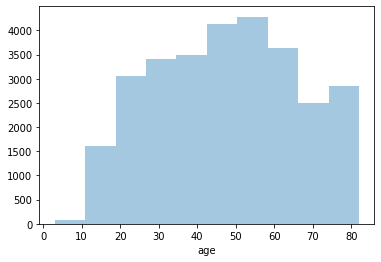

In [9]:
# Histogram for age 
sns.distplot(df1['age'],
             bins = 10, 
             kde = False);

#### The Age of Patient(age) is mostly between 18 to 65.

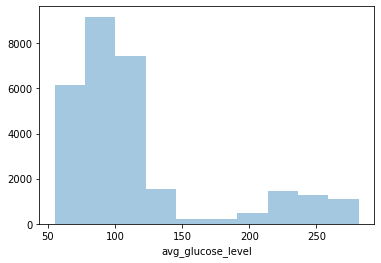

In [10]:
# Histogram for avg_glucose_level 
sns.distplot(df1['avg_glucose_level'],
             bins = 10, 
             kde = False);

#### The Average Glucose level (measured after meal)(avg_glucose_level) is mostly between 56 to 120.

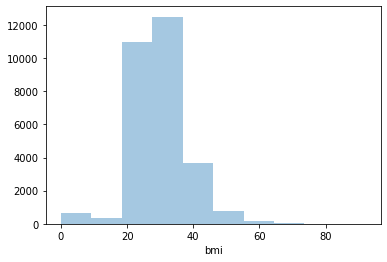

In [11]:
# Histogram for bmi 
sns.distplot(df1['bmi'],
             bins = 10, 
             kde = False);

#### The Body mass index(bmi) is mostly between 19 to 34.

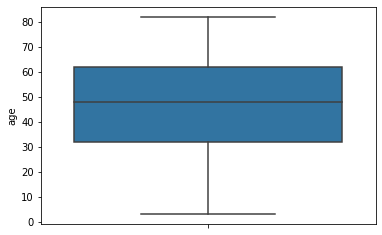

In [12]:
# Boxplot for age
sns.boxplot(y = df1['age']);

#### The median Age of Patient(age) is 47.

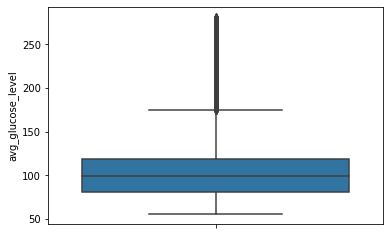

In [13]:
# Boxplot for avg_glucose_level
sns.boxplot(y = df1['avg_glucose_level']);

#### The median Glucose level (measured after meal)(avg_glucose_level) is 91.

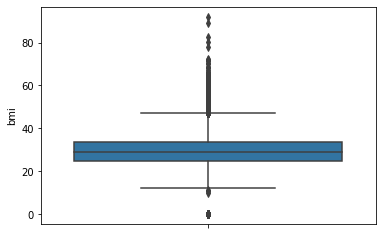

In [14]:
# Boxplot for bmi
sns.boxplot(y = df1['bmi']);

#### The median Body mass index(bmi) is 26.

In [15]:
df1['gender'].value_counts()

Female    17856
Male      11217
Name: gender, dtype: int64

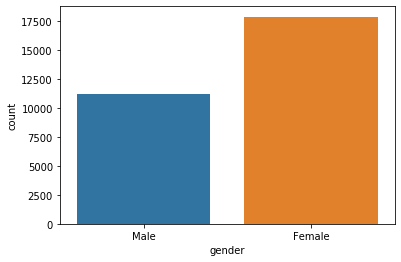

In [16]:
# Countplot for gender
sns.countplot( x = df1['gender']);

#### The number of female patients(gender) is higher than the number of male patients.

In [17]:
df1['hypertension'].value_counts()

N    25832
Y     3241
Name: hypertension, dtype: int64

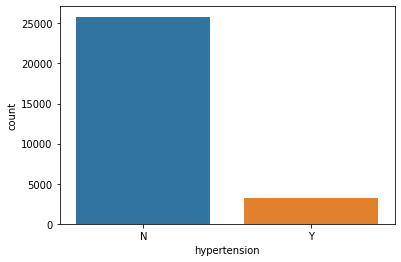

In [18]:
# Countplot for hypertension
sns.countplot( x = df1['hypertension']);

#### The patient suffering from hypertension(hypertension)is lesser than the patient does not suffer from hypertension.

In [19]:
df1['heart_disease'].value_counts()

N    25310
Y     3763
Name: heart_disease, dtype: int64

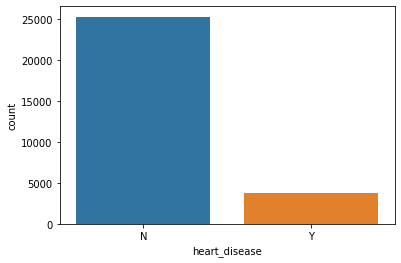

In [20]:
# Countplot for heart_disease
sns.countplot( x = df1['heart_disease']);

#### The patient suffering from heart disease(heart_disease) is lesser than the patient does not suffer from heart disease.

In [21]:
df1['ever_married'].value_counts()

Yes    21690
No      7383
Name: ever_married, dtype: int64

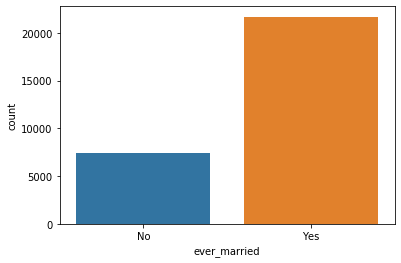

In [22]:
# Countplot for ever_married
sns.countplot( x = df1['ever_married']);

#### The number of patients who are married is higher than the number of patients who were not married.

In [23]:
df1['work_type'].value_counts()

Private          18954
Self-employed     5204
Govt_job          4196
children           618
Never_worked       101
Name: work_type, dtype: int64

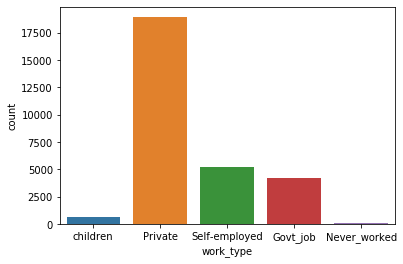

In [24]:
# Countplot for work_type
sns.countplot( x = df1['work_type']);

#### The number of patients working for private is higher than the number of self-employed patients.

In [25]:
df1['Residence_type'].value_counts()

Urban    14595
Rural    14478
Name: Residence_type, dtype: int64

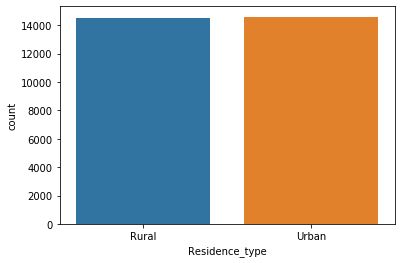

In [26]:
# Countplot for Residence_type
sns.countplot( x = df1['Residence_type']);

#### The number of patients from urban and rural is almost the same.

In [27]:
df1['smoking_status'].value_counts()

never smoked       15748
formerly smoked     7099
smokes              6226
Name: smoking_status, dtype: int64

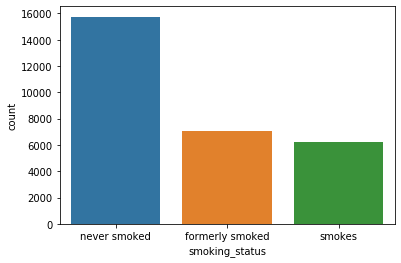

In [28]:
# Countplot for smoking_status
sns.countplot( x = df1['smoking_status']);

#### The number of patients who never smoked is higher than the number of patients who were formerly smoked and smokes.

In [29]:
df1['stroke'].value_counts()

0    24081
1     4992
Name: stroke, dtype: int64

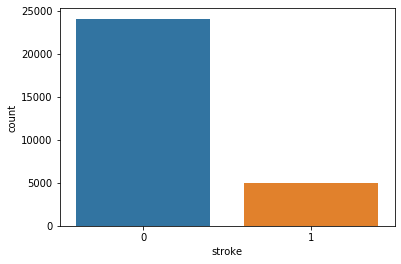

In [30]:
# Countplot for stroke
sns.countplot( x = df1['stroke']);

#### The number of patients who don't have a stroke is higher than the number of patients who have a stroke.

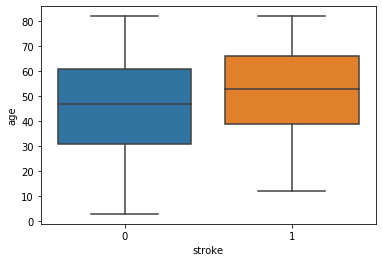

In [31]:
# Paired boxplot of stroke vs age
sns.boxplot(x = 'stroke', 
            y = 'age',
            data = df1);

#### The median age of patients who have stroke is higher than the median age of patients who don't have stroke

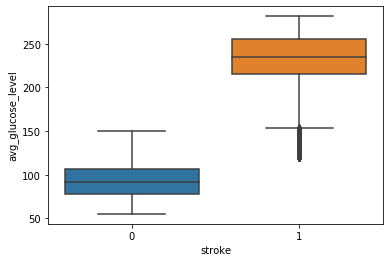

In [32]:
# Paired boxplot of stroke vs avg_glucose_level
sns.boxplot(x = 'stroke', 
            y = 'avg_glucose_level',
            data = df1);

#### The median Average Glucose level (measured after meal)(avg_glucose_level) of patients who have stroke is higher than the median Average Glucose level (measured after meal)(avg_glucose_level) of patients who don't have stroke

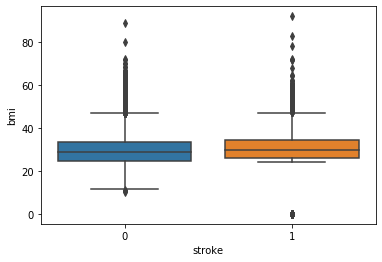

In [33]:
# Paired boxplot of stroke vs bmi
sns.boxplot(x = 'stroke', 
            y = 'bmi',
            data = df1);

#### The median Body Mass Index(bmi) of patients who have stroke is slightly higher than the median Body Mass Index(bmi) of patients of patients who don't have stroke

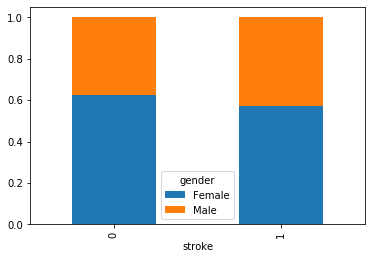

In [34]:
# Stacked Bar plot for stroke vs gender
pd.crosstab(df1['stroke'], 
            df1['gender'], 
            normalize='index').plot(kind='bar', stacked=True);

#### The number of female patients who have stroke is slightly higher than the number of male patients who don't have stroke

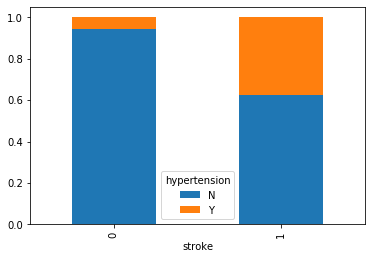

In [35]:
# Stacked Bar plot for stroke vs hypertension
pd.crosstab(df1['stroke'], 
            df1['hypertension'], 
            normalize='index').plot(kind='bar', stacked=True);

#### The number of patients with hypertension has higher chance to get stroke compared to the number of patients without hypertension.

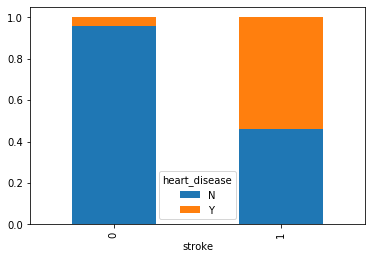

In [36]:
# Stacked Bar plot for stroke vs heart_disease
pd.crosstab(df1['stroke'], 
            df1['heart_disease'], 
            normalize='index').plot(kind='bar', stacked=True);

#### The number of patients with heart disease has a higher chance to get stroke compared to the number of patients without  heart disease.

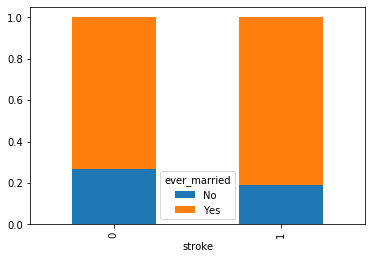

In [37]:
# Stacked Bar plot for stroke vs ever_married
pd.crosstab(df1['stroke'], 
            df1['ever_married'], 
            normalize='index').plot(kind='bar', stacked=True);

#### The number of patients who are married has a higher chance to get stroke compared to the number of patients who were not married.

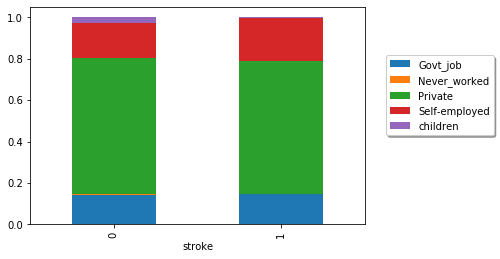

In [38]:
# Stacked Bar plot for stroke vs work_type
ax = pd.crosstab(df1['stroke'], 
            df1['work_type'], 
            normalize='index').plot(kind='bar', stacked=True)
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 0.8), shadow=True, ncol=1);

#### The number of patients who work for private has a higher chance to get stroke compared to the number of self-employed patients.

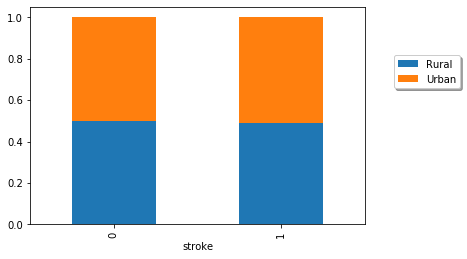

In [39]:
# Stacked Bar plot for stroke vs Residence_type
ax = pd.crosstab(df1['stroke'], 
            df1['Residence_type'], 
            normalize='index').plot(kind='bar', stacked=True);
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 0.8), shadow=True, ncol=1);

#### The chance of getting stroke is almost same for rural and urban patients.

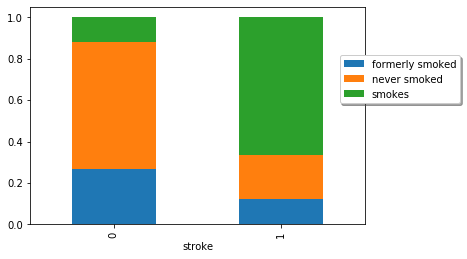

In [40]:
# Stacked Bar plot for stroke vs smoking_status
ax = pd.crosstab(df1['stroke'], 
            df1['smoking_status'], 
            normalize='index').plot(kind='bar', stacked=True);
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 0.8), shadow=True, ncol=1);

#### The number of patients who smokes has a higher chance to get a stroke compared to the patients who were never smoked and formerly smoked.

In [41]:
## Collect numerical variables in a dataframe
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical_df = df1.select_dtypes(include=numerics)

# Remmove the Y variable 
numerical_df.drop('stroke', axis=1, inplace=True)

In [42]:
# Check correlation among numerical independent variables using correlation matrix
cor = numerical_df.corr()
cor

,age,avg_glucose_level,bmi
age,1.000000,0.118925,0.085410
avg_glucose_level,0.118925,1.000000,-0.066337
bmi,0.085410,-0.066337,1.000000


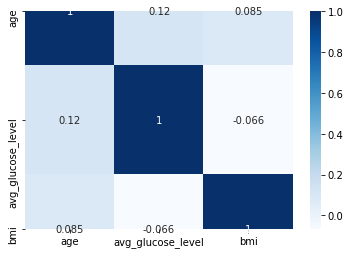

In [43]:
# View heat map of the correlation matrix
sns.heatmap(cor, annot = True,cmap='Blues');

In [44]:
#Highly correlated X variables
c = cor.abs()

# Unstack the correlation matrix
s = c.unstack()

#Filter to exclude values of 1
s = s[s != 1]

# Sort descending to find the highly correlated variables
so = s.sort_values(kind="quicksort", ascending=False)[:10]
so

avg_glucose_level  age                  0.118925
age                avg_glucose_level    0.118925
bmi                age                  0.085410
age                bmi                  0.085410
bmi                avg_glucose_level    0.066337
avg_glucose_level  bmi                  0.066337
dtype: float64

In [45]:
# Define X and Y variables
X = df1.drop('stroke', axis=1)
Y = df1[['stroke']]

In [46]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [47]:
# Build the logistic regression model
import random
random.seed(10)
logreg = sm.Logit(Y,sm.add_constant(X))
lg =logreg.fit()

Optimization terminated successfully.
         Current function value: 0.019482
         Iterations 15


In [48]:
#Summary of logistic regression
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                29073
Model:                          Logit   Df Residuals:                    29058
Method:                           MLE   Df Model:                           14
Date:                Wed, 07 Apr 2021   Pseudo R-squ.:                  0.9575
Time:                        07:16:19   Log-Likelihood:                -566.39
converged:                       True   LL-Null:                       -13332.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -23.1909      1.050    -22.081      0.000     -25.249     -21.132
age                            -0.0106      0.006     -1.799      0.072      -0.

In [49]:
# Display the co-efficients and p values for each independent variable
coeff = pd.DataFrame(lg.params, columns = ['coef'])
coeff['pvalue'] = lg.pvalues.round(3)

# Sort the data in descending order of coefficients to identify significant X variables
coeff.sort_values(by='coef', ascending=False, inplace=True)

#Display only significant X variables
coeff[coeff['pvalue']<=0.05]

,coef,pvalue
smoking_status_smokes,3.526163,0.0
heart_disease_Y,3.038279,0.0
hypertension_Y,2.858139,0.0
avg_glucose_level,0.154140,0.0
bmi,-0.048061,0.0
const,-23.190862,0.0


In [50]:
# Collect the coef in a dataframe
lgcoef = pd.DataFrame(lg.params,columns = ['coef'])

# Calculate Odds Ratio
lgcoef['Odds_ratio'] = np.exp(lgcoef.coef)
lgcoef

,coef,Odds_ratio
const,-23.190862,8.478841e-11
age,-0.010571,9.894848e-01
avg_glucose_level,0.154140,1.166654e+00
bmi,-0.048061,9.530758e-01
gender_Male,-0.047502,9.536083e-01
hypertension_Y,2.858139,1.742907e+01
heart_disease_Y,3.038279,2.086930e+01
ever_married_Yes,0.079414,1.082653e+00
work_type_Never_worked,-5.625172,3.605944e-03
work_type_Private,-0.096479,9.080291e-01


In [51]:
# Calculate probability
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef

,coef,Odds_ratio,probability
const,-23.190862,8.478841e-11,8.478841e-11
age,-0.010571,9.894848e-01,4.973573e-01
avg_glucose_level,0.154140,1.166654e+00,5.384588e-01
bmi,-0.048061,9.530758e-01,4.879871e-01
gender_Male,-0.047502,9.536083e-01,4.881267e-01
hypertension_Y,2.858139,1.742907e+01,9.457379e-01
heart_disease_Y,3.038279,2.086930e+01,9.542738e-01
ever_married_Yes,0.079414,1.082653e+00,5.198431e-01
work_type_Never_worked,-5.625172,3.605944e-03,3.592988e-03
work_type_Private,-0.096479,9.080291e-01,4.758990e-01


In [52]:
# Calculate p value
lgcoef['pval'] = lg.pvalues

#Display rounded to 2 decimal points
pd.options.display.float_format = '{:.2f}'.format
lgcoef

,coef,Odds_ratio,probability,pval
const,-23.19,0.00,0.00,0.00
age,-0.01,0.99,0.50,0.07
avg_glucose_level,0.15,1.17,0.54,0.00
bmi,-0.05,0.95,0.49,0.00
gender_Male,-0.05,0.95,0.49,0.77
hypertension_Y,2.86,17.43,0.95,0.00
heart_disease_Y,3.04,20.87,0.95,0.00
ever_married_Yes,0.08,1.08,0.52,0.73
work_type_Never_worked,-5.63,0.00,0.00,0.81
work_type_Private,-0.10,0.91,0.48,0.69


In [53]:
# Calculate p value
lgcoef['pval'] = lg.pvalues

#Display rounded to 2 decimal points
pd.options.display.float_format = '{:.2f}'.format
lgcoef

,coef,Odds_ratio,probability,pval
const,-23.19,0.00,0.00,0.00
age,-0.01,0.99,0.50,0.07
avg_glucose_level,0.15,1.17,0.54,0.00
bmi,-0.05,0.95,0.49,0.00
gender_Male,-0.05,0.95,0.49,0.77
hypertension_Y,2.86,17.43,0.95,0.00
heart_disease_Y,3.04,20.87,0.95,0.00
ever_married_Yes,0.08,1.08,0.52,0.73
work_type_Never_worked,-5.63,0.00,0.00,0.81
work_type_Private,-0.10,0.91,0.48,0.69


In [54]:
# Sort by descending order of odds_ratio
lgcoef = lgcoef.sort_values(by = 'Odds_ratio', ascending =  False)

# Filter to display only variables with significant p value
pval_filter = lgcoef['pval'] <= 0.05
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
smoking_status_smokes,3.53,33.99,0.97,0.00
heart_disease_Y,3.04,20.87,0.95,0.00
hypertension_Y,2.86,17.43,0.95,0.00
avg_glucose_level,0.15,1.17,0.54,0.00
bmi,-0.05,0.95,0.49,0.00
const,-23.19,0.00,0.00,0.00


## Predictions & model evaluation

In [55]:
## Logistic Regression using sklearn
logreg = LogisticRegression()
logreg.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
logreg.coef_

array([[-0.02328958,  0.10610118, -0.06788296, -0.09247348,  2.45899436,
         2.62177374, -0.02680098, -0.41964103, -0.48913872, -0.37209725,
        -1.56532637,  0.0561619 , -0.81535357,  2.40152822]])

In [57]:
#Predict Y class
Y_pred = logreg.predict(X)
Y_pred[1:10]

array([1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [58]:
#Predict Y probability
Y_pred_prob = logreg.predict_proba(X)
Y_pred_prob[:10].round(5)

array([[9.9962e-01, 3.8000e-04],
       [5.0000e-05, 9.9995e-01],
       [9.9999e-01, 1.0000e-05],
       [9.9985e-01, 1.5000e-04],
       [9.9569e-01, 4.3100e-03],
       [0.0000e+00, 1.0000e+00],
       [9.9924e-01, 7.6000e-04],
       [9.9992e-01, 8.0000e-05],
       [9.9964e-01, 3.6000e-04],
       [9.9993e-01, 7.0000e-05]])

In [59]:
# Append Y_pred_prob to original df and write a csv file for analysis
df1['pred_prob'] = Y_pred_prob[:,1]
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,pred_prob
0,Male,3,N,N,No,children,Rural,95.12,18.00,never smoked,0,0.00
1,Male,58,Y,N,Yes,Private,Urban,255.00,39.20,never smoked,1,1.00
2,Female,70,N,N,Yes,Private,Rural,69.04,35.90,formerly smoked,0,0.00
3,Female,52,N,N,Yes,Private,Urban,77.59,17.70,formerly smoked,0,0.00
4,Female,75,N,Y,Yes,Self-employed,Rural,103.00,27.00,never smoked,0,0.00


In [60]:
df1.to_csv('Predicted_data_Stroke.csv')

In [61]:
#Build the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [62]:
confusion_matrix(Y,Y_pred)

array([[24031,    50],
       [  180,  4812]], dtype=int64)

In [63]:
accuracy_score(Y,Y_pred)

0.9920888797165756

In [64]:
recall_score(Y,Y_pred)

0.9639423076923077

In [65]:
precision_score(Y,Y_pred)

0.9897161661867544

In [66]:
print(classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     24081
           1       0.99      0.96      0.98      4992

    accuracy                           0.99     29073
   macro avg       0.99      0.98      0.99     29073
weighted avg       0.99      0.99      0.99     29073



In [67]:
#AUC Value
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y,Y_pred)
logit_roc_auc

0.9809329909791632

(0.0, 1.05)

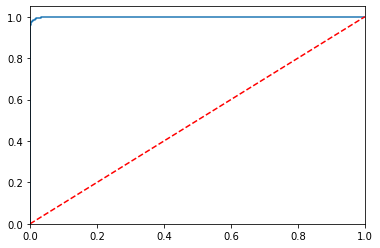

In [68]:
#Plotting the ROC Curve
fpr, tpr, threshold = roc_curve(Y,Y_pred_prob[:,1])
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

## Optimizing Cutoff Value

In [69]:
# Predict the probability value for X
pred_proba_df = pd.DataFrame(Y_pred_prob)

# Use Cut-off value to predict the recall_score and accuracy_score.
cutoff_list = [0.2,0.8]
for i in cutoff_list:
    print ('\n******** For i = {} ******'.format(i))
    y_pred_prob = pd.DataFrame(np.where(pred_proba_df[pred_proba_df.columns] > i, 1, 0))
    test_recall_score = metrics.recall_score(Y.to_numpy(),y_pred_prob.iloc[:,1])
    test_acu_score = metrics.roc_auc_score(Y.to_numpy(),y_pred_prob.iloc[:,1])
    test_precision_score = metrics.precision_score(Y.to_numpy(),y_pred_prob.iloc[:,1])
    print('Our testing recall is {:.2f}'.format(test_recall_score))
    print('Our Accuracy score is {:.2f}'.format(test_acu_score))
    print('Our Precision score is {:.2f}'.format(test_precision_score))


******** For i = 0.2 ******
Our testing recall is 0.98
Our Accuracy score is 0.99
Our Precision score is 0.96

******** For i = 0.8 ******
Our testing recall is 0.94
Our Accuracy score is 0.97
Our Precision score is 1.00
